In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler

In [142]:
#Load the data
train_data = pd.read_csv('../dataset/raw/train.csv')
test_data = pd.read_csv('../dataset/raw/test.csv')
test_data_survived = pd.read_csv('../dataset/raw/gender_submission.csv')

# Handle missing values
train_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='ffill', inplace=True)

# Convert categorical variables to numerical
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

#Check the data
print("Tarin Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

print(test_data_survived["Survived"].head())

Tarin Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN      True       False        True  
1          PC 17599  71.2833   C85     False       False       False  
2  STON/O2. 3101282   7.9250   C85     False       False        True  
3            113803  53.1000  

C:\Users\tarun\AppData\Local\Temp\ipykernel_28160\2909324183.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='ffill', inplace=True)
C:\Users\tarun\AppData\Local\Temp\ipykernel_28160\2909324183.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data.fillna(method='ffill', inplace=True)


In [143]:
# Select features and target
X_train = train_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y_train = train_data['Survived']
X_test = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
y_test = test_data_survived['Survived']

print("Training set of Independent variables after features scaling:")
print(X_train[:5])
print("\nTraining set of Dependent variables:")
print(y_train[:5])
print("\nTesting set of Independent variables after features scaling:")
print(X_test[:5])
print("\nTesting set of Dependent variables:")
print(y_test[:5])


Training set of Independent variables after features scaling:
[[-1.73010796  0.82737724 -0.52119766  0.43279337 -0.47367361 -0.50244517
   0.73769513 -0.30974338  0.61930636]
 [-1.72622007 -1.56610693  0.57872934  0.43279337 -0.47367361  0.78684529
  -1.35557354 -0.30974338 -1.61470971]
 [-1.72233219  0.82737724 -0.24621591 -0.4745452  -0.47367361 -0.48885426
  -1.35557354 -0.30974338  0.61930636]
 [-1.71844431 -1.56610693  0.37249302  0.43279337 -0.47367361  0.42073024
  -1.35557354 -0.30974338  0.61930636]
 [-1.71455642  0.82737724  0.37249302 -0.4745452  -0.47367361 -0.48633742
   0.73769513 -0.30974338  0.61930636]]

Training set of Dependent variables:
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Testing set of Independent variables after features scaling:
[[ 1.73399584  0.82737724  0.33812031 -0.4745452  -0.47367361 -0.49078316
   0.73769513  3.22847904 -1.61470971]
 [ 1.73788372  0.82737724  1.19743827  0.43279337 -0.47367361 -0.50747884
  -1.35557354 -0.3097

In [145]:
# Train the logistic regression model
model = LogisticRegression(max_iter=10, random_state=7)
model.fit(X_train, y_train)


LogisticRegression(max_iter=10, random_state=7)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
Test Accuracy: 0.937799043062201

Confusion Matrix:
[[250  16]
 [ 10 142]]

Formatted Classification Report:
              precision  recall  f1-score 

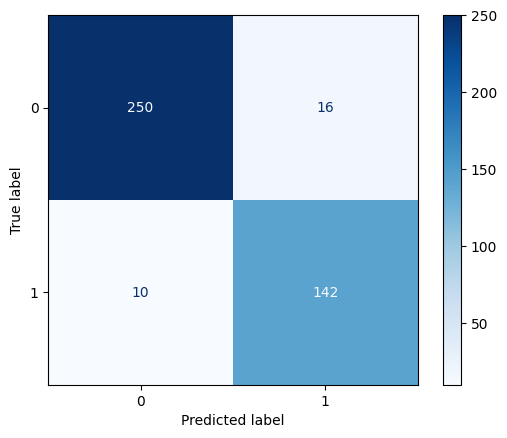

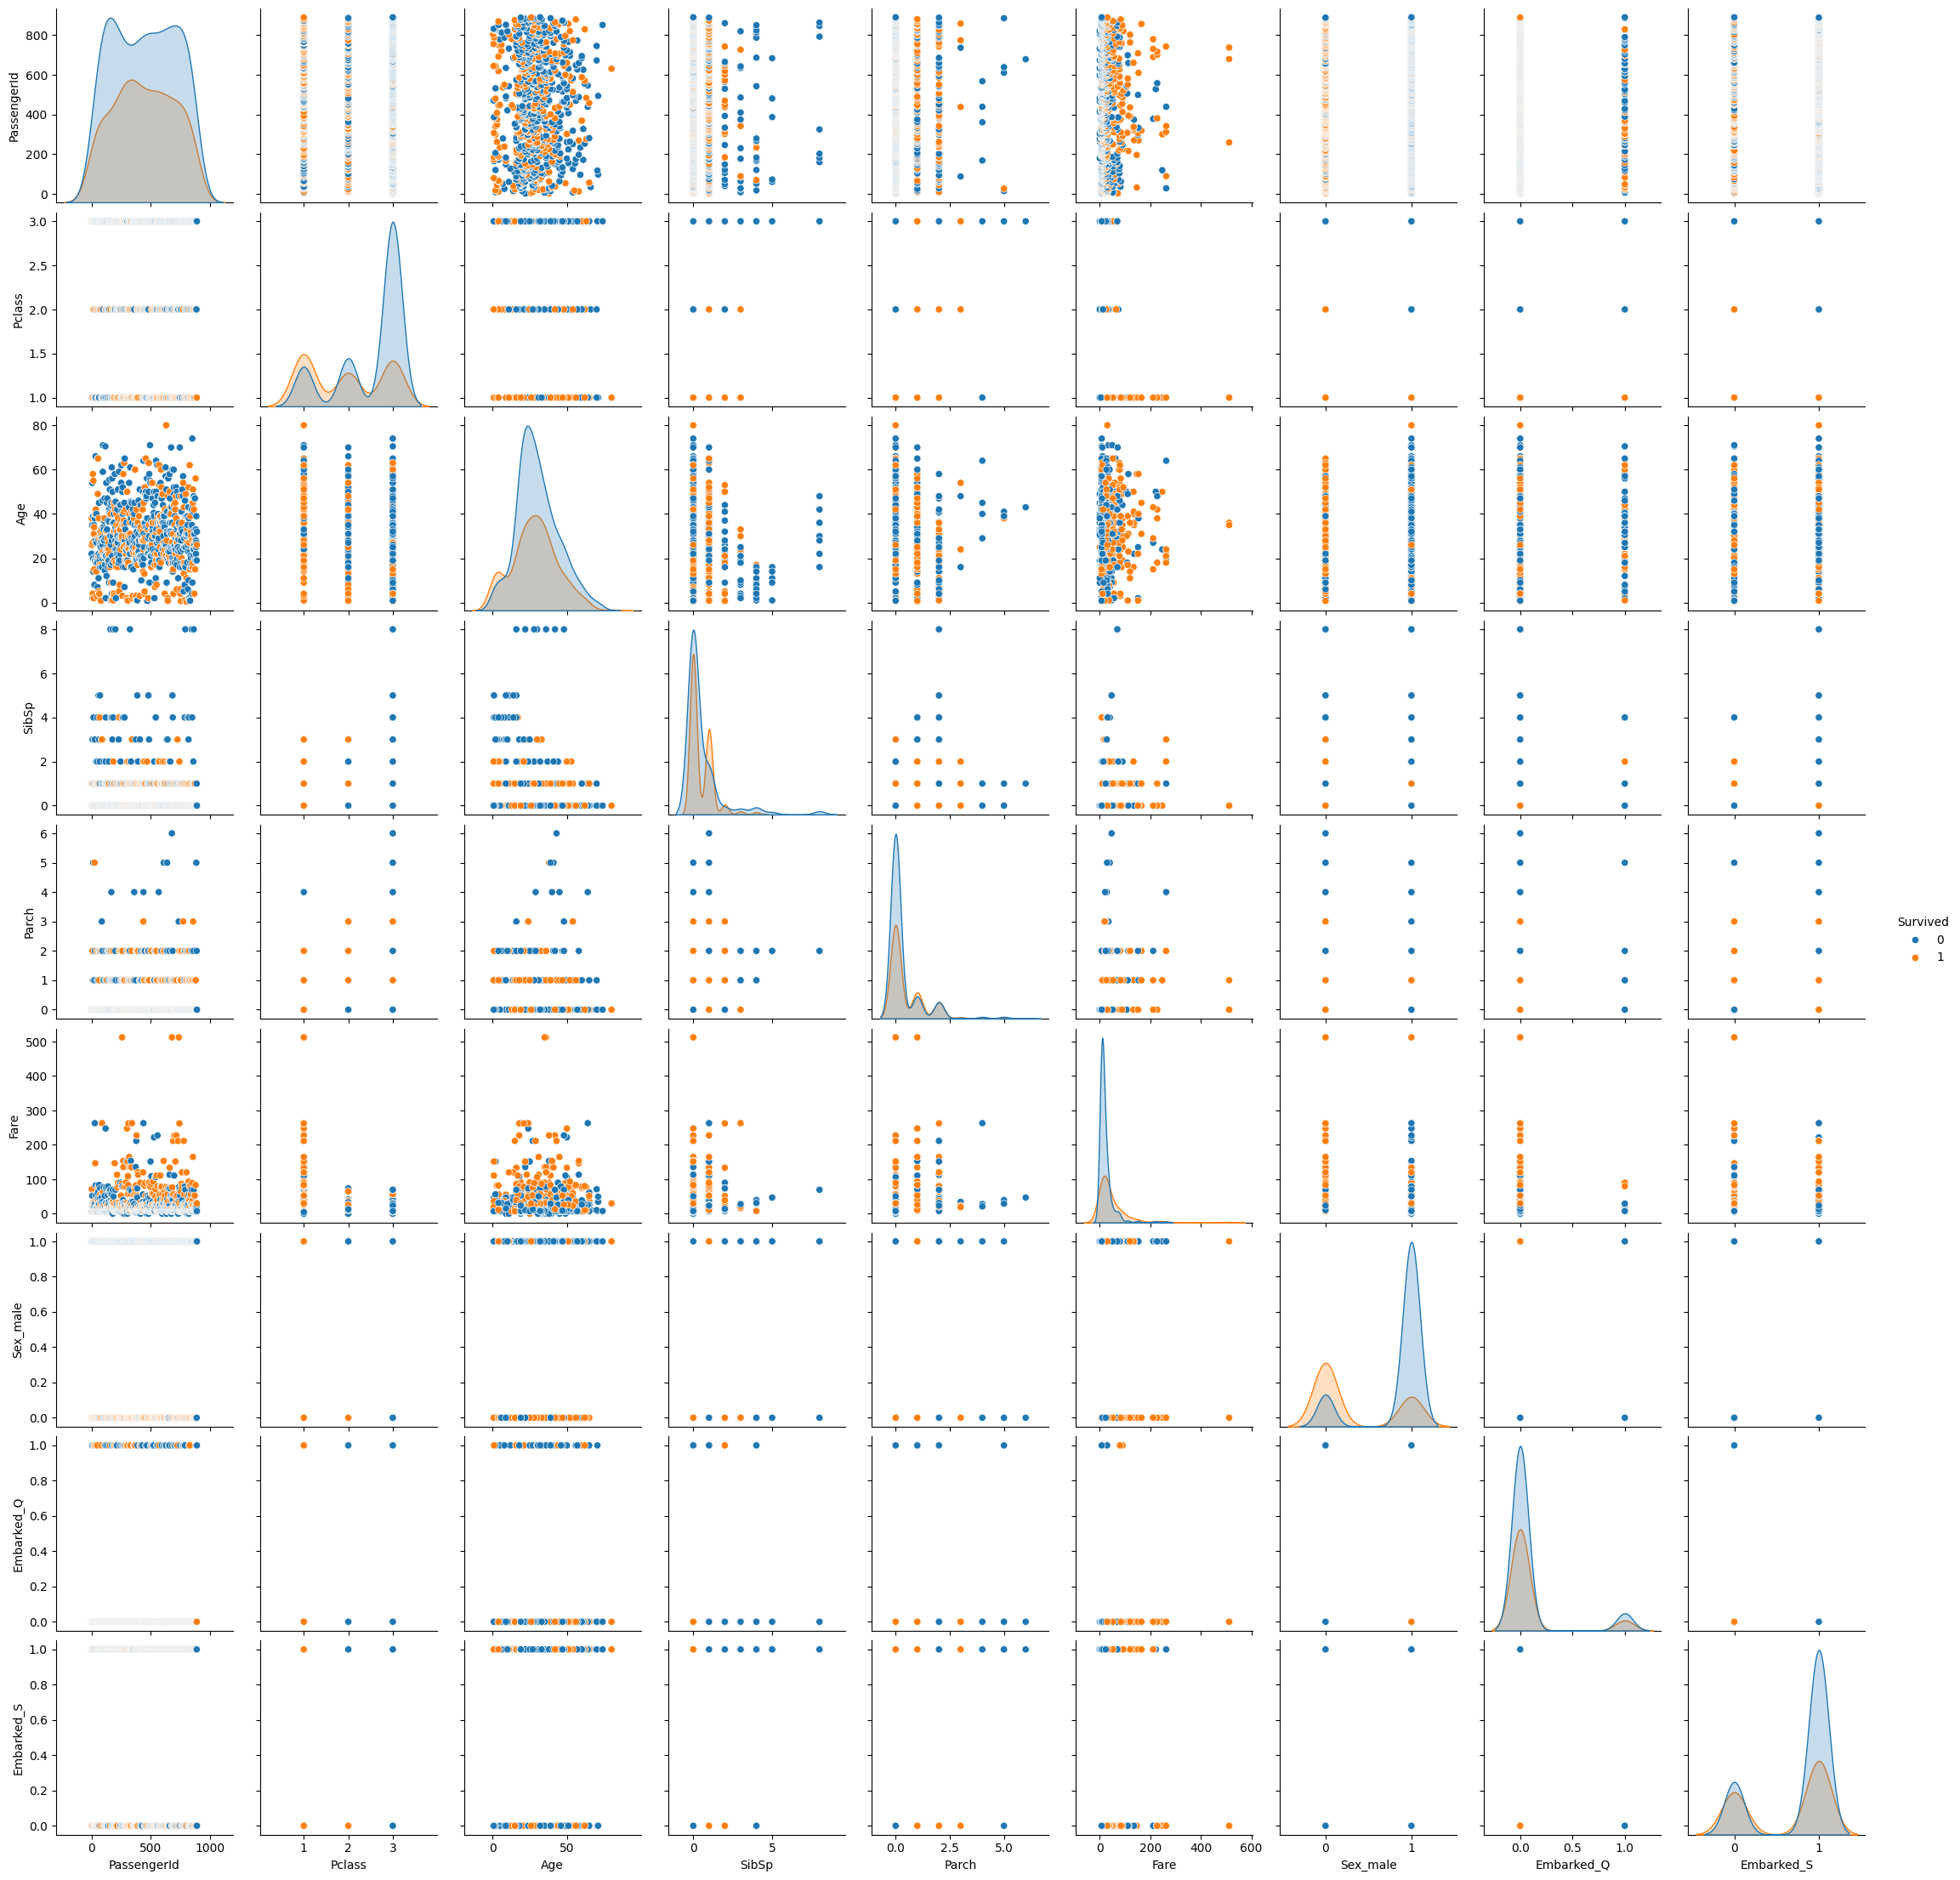

In [146]:
y_test = test_data_survived['Survived']

# Predict on the test data
test_predictions = model.predict(X_test)
print(test_predictions)

# Calculate the accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {accuracy}')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display the classification report
class_report = classification_report(y_test, test_predictions, target_names=['Not Survived', 'Survived'], output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

class_report_df = class_report_df.round(2)
print("\nFormatted Classification Report:")
print(class_report_df)

# Display the confusion matrix using matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Pair plot to visualize pairwise relationships between features
sns.pairplot(train_data, hue='Survived', diag_kind='kde')
plt.show()

In [147]:
import joblib

joblib.dump(model, '../models/logistic_regression_model_main.pkl')
print("Model saved successfully!")

Model saved successfully!


In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [149]:
models = {
    "Support Vector Machine": SVC(kernel='linear', random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Logistic Regression": LogisticRegression(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(random_state=0),
    "Neural Network (MLP)": MLPClassifier(random_state=0),
    "Naive Bayes": GaussianNB(),
}


In [150]:
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    results.append([model_name, accuracy])
    file_name = model_name.lower().replace(" ", "_") + ".pkl"
    joblib.dump(model, f"../models/{file_name}")

# Create a DataFrame for the results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])


Support Vector Machine Accuracy: 100.00%
K-Nearest Neighbors Accuracy: 81.34%
Decision Tree Accuracy: 77.03%
Logistic Regression Accuracy: 93.78%
Random Forest Accuracy: 80.38%
Gradient Boosting Accuracy: 82.78%
Neural Network (MLP) Accuracy: 76.32%
Naive Bayes Accuracy: 91.39%


c:\Users\tarun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


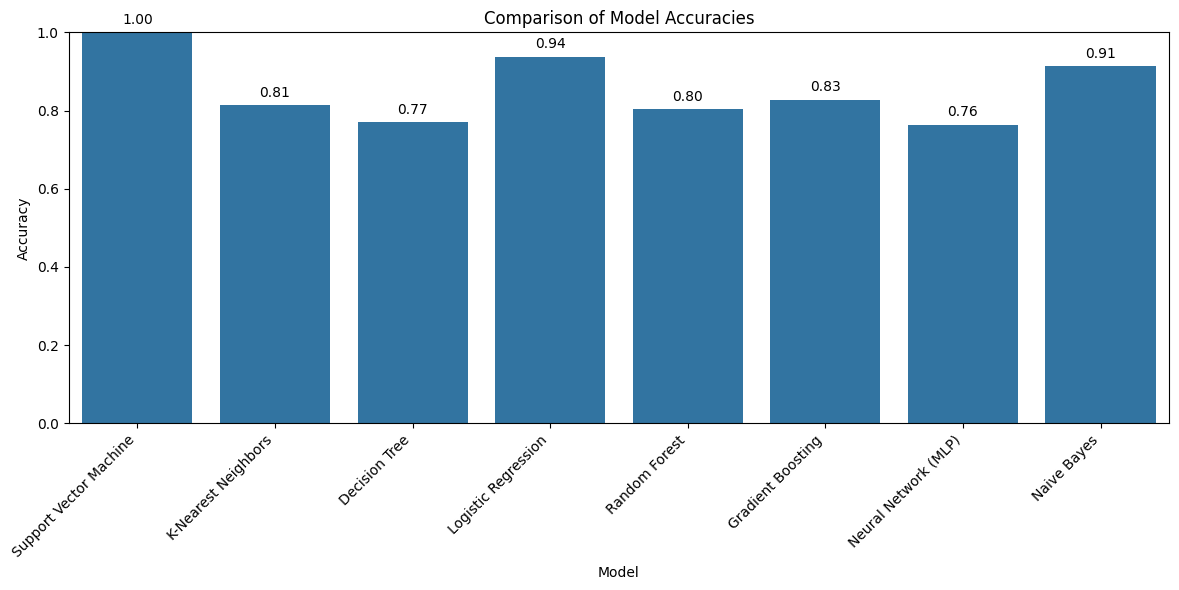

In [151]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Comparison of Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Add text labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.tight_layout()
plt.show()


In [155]:
import joblib
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

# Function to load all models from a specified folder
def load_models_from_folder(folder_path):
    models = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.pkl'):
            model_name = filename.split('.')[0]
            model_path = os.path.join(folder_path, filename)
            models[model_name] = joblib.load(model_path)
    return models

# Function to take input for the Titanic dataset
def get_titanic_input():
    Pclass = int(input("Enter Pclass (1, 2, or 3): "))
    Sex = input("Enter Sex (male or female): ")
    Age = float(input("Enter Age: "))
    SibSp = int(input("Enter number of siblings/spouses aboard: "))
    Parch = int(input("Enter number of parents/children aboard: "))
    Fare = float(input("Enter Fare: "))
    Embarked = input("Enter Embarked (C, Q, or S): ")

    # Convert categorical variables to numerical
    Sex = 1 if Sex == 'male' else 0
    Embarked_C = 1 if Embarked == 'C' else 0
    Embarked_Q = 1 if Embarked == 'Q' else 0
    Embarked_S = 1 if Embarked == 'S' else 0

    # Create input array
    input_data = np.array([[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked_C, Embarked_Q, Embarked_S]])
    print("Pclass:", Pclass)
    print("Sex:", Sex)
    print("Age:", Age)
    print("Siblings/Spouses:", SibSp)
    print("Parents/Children:", Parch)
    print("Fare:", Fare)
    print("Embarked_C:", Embarked_C)
    print("Embarked_Q:", Embarked_Q)
    print("Embarked_S:", Embarked_S)
    print("\n")
    return input_data

# Load models from the specified folder
folder_path = '../models'  # Replace with the path to your models folder
models = load_models_from_folder(folder_path)

# Get input data
input_data = get_titanic_input()

survive_dict = {
    0: "Not Survived",
    1: "Survived"
}

# Predict using each model and print the outputs
for model_name, model in models.items():
    output = model.predict(input_data)
    print(f'Output from {model_name}: {survive_dict[output[0]]}')

Pclass: 3
Sex: 1
Age: 35.0
Siblings/Spouses: 0
Parents/Children: 0
Fare: 8.05
Embarked_C: 0
Embarked_Q: 0
Embarked_S: 1


Output from decision_tree: Not Survived
Output from gradient_boosting: Survived
Output from k-nearest_neighbors: Not Survived
Output from logistic_regression: Not Survived
Output from logistic_regression_model_main: Not Survived
Output from naive_bayes: Survived
Output from neural_network_(mlp): Not Survived
Output from random_forest: Not Survived
Output from support_vector_machine: Not Survived


In [116]:
X_test[0]

array([ 1.73399584,  0.82737724,  0.33812031, -0.4745452 , -0.47367361,
       -0.49078316,  0.73769513,  3.22847904, -1.61470971])